In [1]:
!pip install polars
!pip install japanize_matplotlib
!pip install --user --force-reinstall pyarrow

  Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.2 kB)
Using cached pyarrow-22.0.0-cp312-cp312-manylinux_2_28_x86_64.whl (47.7 MB)
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 22.0.0
    Uninstalling pyarrow-22.0.0:
      Successfully uninstalled pyarrow-22.0.0


In [2]:
import os
import polars as pl
from matplotlib import pyplot as plt
# plt.rcParams['font.family'] = ['IPAexGothic']
import japanize_matplotlib

In [3]:
df_pos = pl.read_csv('./data/pos.csv', encoding='utf-8-sig')
df_product = pl.read_csv('./data/product.csv', encoding='utf-8-sig')
df_weather = pl.read_csv('./data/weather.csv', encoding='utf-8-sig')

In [4]:
#月ごと
(df_pos
 .with_columns(
                pl.col('datetime').str.strptime(pl.Date, "%Y/%m/%d %H:%M")
                .dt.month()
                .alias('date')
            )
 .group_by('date')
 .agg(pl.col('amount').sum())
 .sort('date')

)

date,amount
i8,i64
1,1290530
2,956070
3,1525270
4,1725320
5,1923890
…,…
8,1622870
9,1177790
10,1991280


In [5]:
#天気
(df_weather
 .group_by('weather')
 .agg(pl.col('max_temperature').max(),
      pl.col('min_temperature').min())
 .with_columns(
     ((pl.col('max_temperature')+pl.col('min_temperature'))/2).alias('average'))
)

weather,max_temperature,min_temperature,average
str,f64,f64,f64
"""晴れ""",40.4,-12.5,13.95
"""雨""",39.9,-11.9,14.0
"""曇り""",35.2,-7.2,14.0


In [6]:
# 件数
len(df_pos)

32459

Text(0, 0.5, '売上金額(万)')

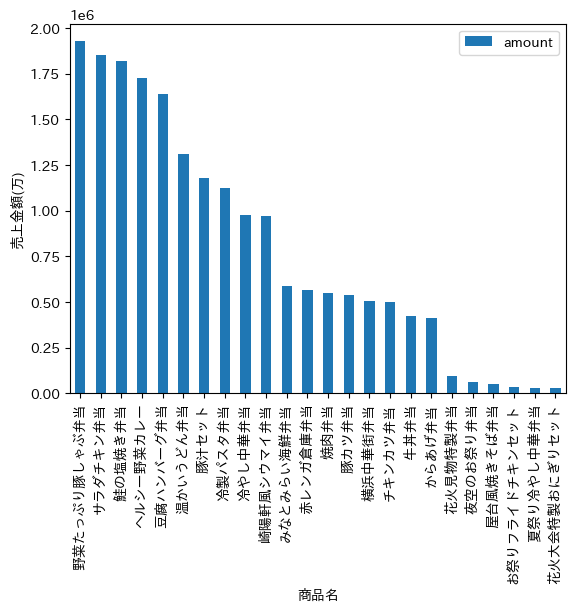

In [7]:
(df_pos
 .group_by('product_name')
 .agg(pl.col('amount').sum())
 .sort('amount',descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )
plt.xlabel('商品名')
plt.ylabel('売上金額(万)')

Text(0, 0.5, '売上個数')

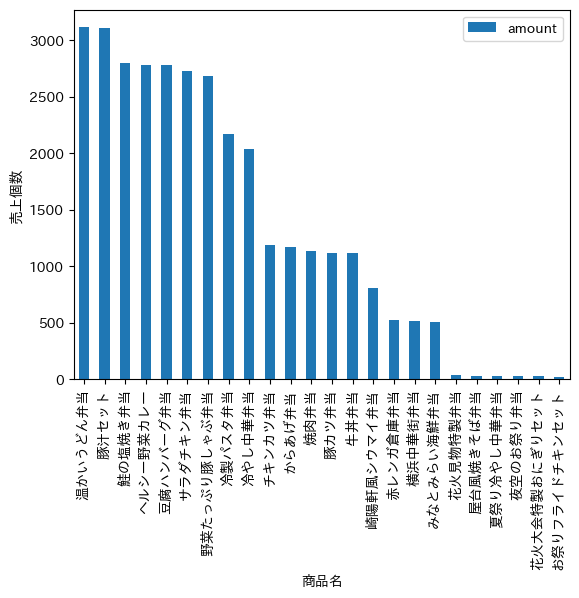

In [8]:
(df_pos
 .group_by('product_name')
 .agg(pl.col('amount').count())
 .sort('amount',descending=True)

 .to_pandas()
 .plot(kind='bar', x='product_name', y='amount')
 )
plt.xlabel('商品名')
plt.ylabel('売上個数')

In [9]:
#支払方法
(df_pos
 .group_by('payment_method')
 .agg(pl.col('amount').count())

)

payment_method,amount
str,u32
"""カード""",10768
"""電子マネー""",10835
"""現金""",10856


In [ ]:
# 天気ごとに商品のカウント
(df_weather
 .join(df_pos
       ,how='full'
       ,on='')

)
